In [45]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist.load_data()
fashion_mnist

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist

In [ ]:
x_train_full.shape

(60000, 28, 28)

In [ ]:
y_train_full.shape

(60000,)

In [ ]:
#holding out the last 5000 images from the training set for validition
x_train , y_train = x_train_full[ : -5000], y_train_full[ : -5000]
x_valid, y_valid = x_train_full[-5000 :], y_train_full[-5000 :]

In [ ]:
x_train.shape[0]

55000

In [ ]:
y_train.shape[0]

55000

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_test.shape

In [ ]:
x_valid.shape[0]

5000

In [ ]:
y_valid.shape[0]

5000

In [ ]:
#scaling the pixels to the 0-1 range by dividing them by 255.0 this also converts them to float
x_train, x_valid, x_test = x_train / 255.0, x_valid / 255.0, x_test / 255.0

In [ ]:
x_train.shape[0]

55000

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[y_train[1]]

'T-shirt/top'

# ***Creating the model using the Squential API***

In [80]:
#classification MLP
tf.random.set_seed(42)
model= tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))   # we add a flaten layer to convert each input image into a 1D array.
tf.keras.layers.Dropout(0.2),
model.add(keras.layers.Dense(300, activation = 'relu'))
tf.keras.layers.Dropout(0.2),
model.add(keras.layers.Dense(100, activation = 'relu'))
tf.keras.layers.Dropout(0.2),
model.add(keras.layers.Dense(50, activation = 'relu'))
tf.keras.layers.Dropout(0.1),
model.add(keras.layers.Dense(25, activation = 'relu'))
tf.keras.layers.Dropout(0.1),
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [81]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 272,185 (1.04 MB)

 Trainable params: 272,185 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [82]:
tf.keras.backend.clear_session()

In [84]:
model.layers   # to get a list of model

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=dense_7, built=True>,
 <Dense name=dense_8, built=True>]

In [85]:
hidden = model.layers[1]
hidden.name

'dense_4'

In [87]:
# we can this method
model.get_layer('dense_8')

<Dense name=dense_8, built=True>

In [88]:
weights, biases = hidden.get_weights()

In [89]:
weights

array([[ 0.05176839,  0.04859594, -0.04061529, ..., -0.03707187,
        -0.05043211,  0.05799349],
       [-0.02229471, -0.01263558,  0.01481987, ..., -0.04470306,
         0.05337706, -0.00475614],
       [-0.03618792,  0.02584343,  0.03748205, ...,  0.04949617,
         0.00760782,  0.02358054],
       ...,
       [-0.02485662, -0.00143554, -0.02551867, ..., -0.07300191,
         0.0204054 ,  0.01713136],
       [-0.04575797,  0.01681804, -0.0186286 , ..., -0.00438382,
         0.00677781, -0.05450073],
       [-0.07020297,  0.0198504 , -0.0460717 , ..., -0.01448845,
        -0.00934904,  0.06324911]], dtype=float32)

In [90]:
weights.shape

(784, 300)

In [91]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [92]:
biases.shape

(300,)

In [93]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

# ***Training and Evaluating the model***

In [94]:
model.fit(x_train, y_train, epochs= 20, validation_data =(x_valid, y_valid))

Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6156 - loss: 1.1287 - val_accuracy: 0.8196 - val_loss: 0.5206
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8205 - loss: 0.5171 - val_accuracy: 0.8358 - val_loss: 0.4616
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8426 - loss: 0.4494 - val_accuracy: 0.8444 - val_loss: 0.4271
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8543 - loss: 0.4111 - val_accuracy: 0.8510 - val_loss: 0.4148
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8628 - loss: 0.3857 - val_accuracy: 0.8528 - val_loss: 0.4044
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8684 - loss: 0.3656 - val_accuracy: 0.8576 - val_loss: 0.3891
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8745 - loss: 0.3486 - val_accuracy: 0.8620 - val_loss: 0.3795
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8786 - loss: 0.3338

In [78]:
model.fit(x_test, y_test, epochs= 10, validation_data =(x_valid, y_valid))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9178 - loss: 0.2281 - val_accuracy: 0.8876 - val_loss: 0.3121
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9254 - loss: 0.1950 - val_accuracy: 0.8864 - val_loss: 0.3089
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9352 - loss: 0.1793 - val_accuracy: 0.8872 - val_loss: 0.3095
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9395 - loss: 0.1678 - val_accuracy: 0.8860 - val_loss: 0.3116
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9444 - loss: 0.1587 - val_accuracy: 0.8864 - val_loss: 0.3143
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9488 - loss: 0.1508 - val_accuracy: 0.8858 - val_loss: 0.3155
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9511 - loss: 0.1438 - val_accuracy: 0.8870 - val_loss: 0.3193
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9572 - loss: 0.1377 - val_accuracy: 0.

In [ ]:
#Tune the learning rate
tf.optimizers.SGD(learning_rate= 0.001)

In [ ]:
tf.keras.utils.to_categorical(y_train)

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

# ***Showing the images using Matplotlib***

In [57]:
def plot_sample(index):
    plt.figure(figsize= (10, 5))
    plt.imshow(x_train[index])

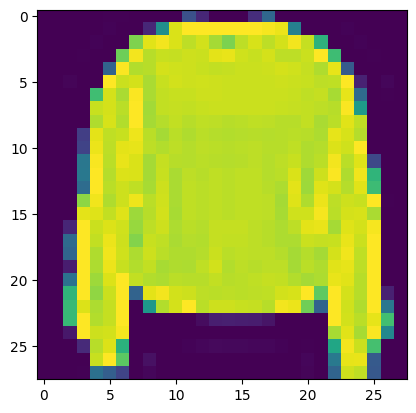

In [48]:
plt.imshow(x_train[7])

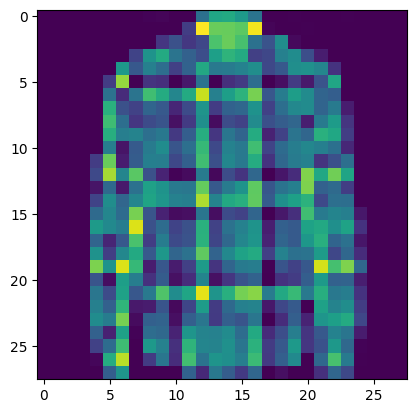

In [53]:
plt.imshow(x_test[7])

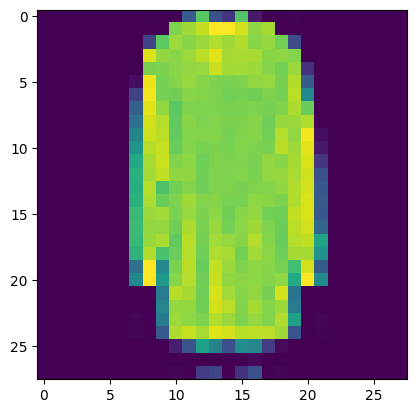

In [54]:
plt.imshow(x_valid[7])

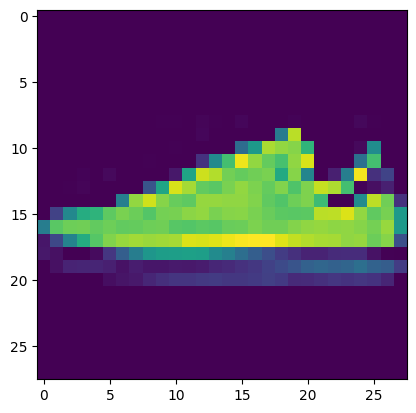

In [49]:
plt.imshow(x_train[6])

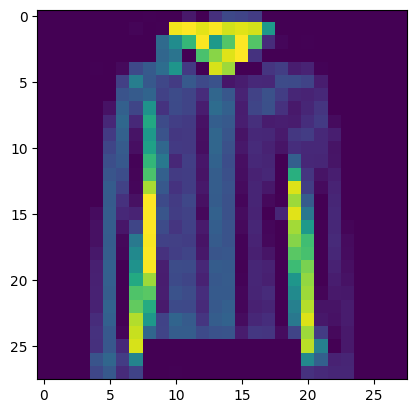

In [55]:
plt.imshow(x_test[6])

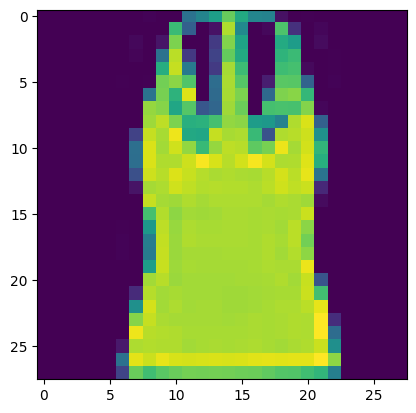

In [56]:
plt.imshow(x_valid[6])

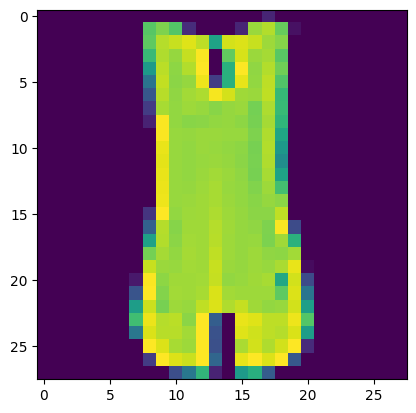

In [50]:
plt.imshow(x_train[4])

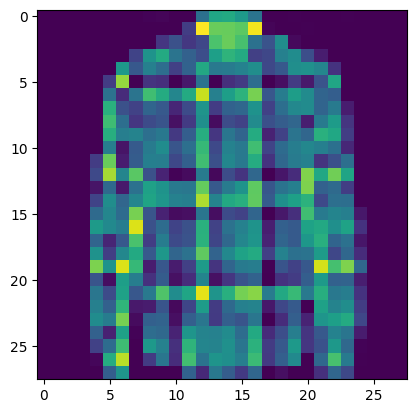

In [51]:
plt.imshow(x_test[7])

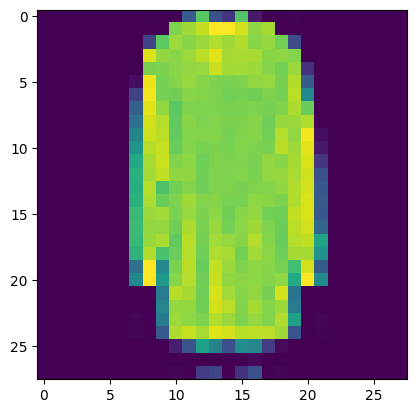

In [52]:
plt.imshow(x_valid[7])

# ***Saving The Model***

 is a command used in TensorFlow/Keras to save a trained model to disk. This saves the entire model, including:

Model architecture: The structure of the layers and the model itself.
Model weights: The trained weights learned during the training process.
Optimizer state: Information about the optimizer, such as learning rate and momentum.
Training configuration: Loss function, metrics, e

In [98]:
model.save('my_model.keras')

In [99]:
model = tf.keras.models.load_model('my_model.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
